In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("datos_proyecto_athena.csv", sep=',')
print(df.shape)
df.tail()

(334948, 17)


,cole_cod_dane_sede,periodo,cole_naturaleza,cole_bilingue,cole_calendario,cole_jornada,fami_tieneautomovil,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,estu_edad,punt_c_naturales,punt_lectura_critica,punt_sociales_ciudadanas,punt_matematicas,desemp_ingles,punt_global
334943,311001042667,20171,NO OFICIAL,S,B,COMPLETA,Si,Estrato 5,Si,Si,24,62,72,73,75.0,B1,355
334944,311769000866,20171,NO OFICIAL,N,B,COMPLETA,Si,Estrato 6,Si,Si,24,76,70,69,72.0,B+,362
334945,311848000278,20171,NO OFICIAL,S,B,COMPLETA,Si,Estrato 4,Si,Si,24,68,72,72,74.0,B+,361
334946,311848000936,20171,NO OFICIAL,S,B,COMPLETA,Si,Estrato 6,Si,Si,25,49,49,52,54.0,B1,262
334947,311769001781,20171,NO OFICIAL,S,B,COMPLETA,Si,Estrato 5,Si,Si,25,84,68,65,83.0,B+,378


# Análisis exploratorio

## Edad del estudiante

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_7024\2885252734.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, y="estu_edad", binwidth=1, palette="light:m_r", edgecolor=".3")


[Text(0, 0, '859'),
 Text(0, 0, '31237'),
 Text(0, 0, '53646'),
 Text(0, 0, '24426'),
 Text(0, 0, '43622'),
 Text(0, 0, '59970'),
 Text(0, 0, '46239'),
 Text(0, 0, '44584'),
 Text(0, 0, '18100'),
 Text(0, 0, '6147'),
 Text(0, 0, '1671'),
 Text(0, 0, '766'),
 Text(0, 0, '565'),
 Text(0, 0, '439'),
 Text(0, 0, '374'),
 Text(0, 0, '348'),
 Text(0, 0, '294'),
 Text(0, 0, '225'),
 Text(0, 0, '237'),
 Text(0, 0, '203'),
 Text(0, 0, '199'),
 Text(0, 0, '207'),
 Text(0, 0, '213'),
 Text(0, 0, '377')]

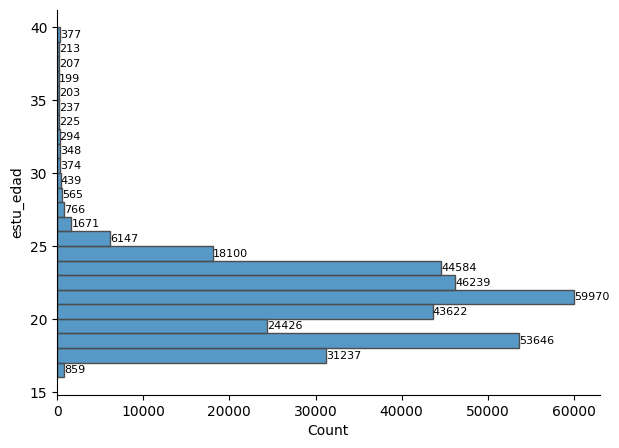

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Análisis de edad
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.histplot(data=df, y="estu_edad", binwidth=1, palette="light:m_r", edgecolor=".3")
ax.bar_label(ax.containers[1], fontsize=8)

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_7024\2016759654.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="estu_edad", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)


<Axes: xlabel='estu_edad', ylabel='punt_global'>

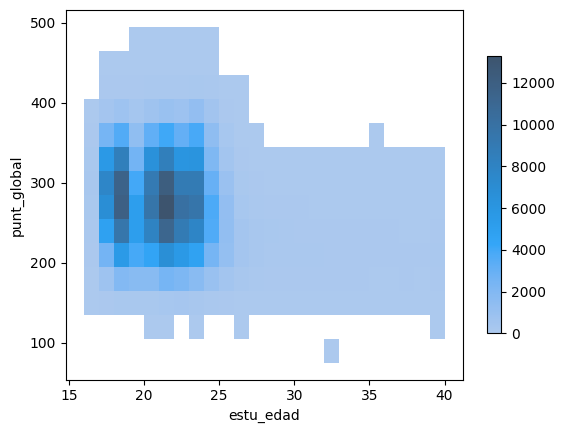

In [5]:
sns.histplot(data=df, x="estu_edad", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)

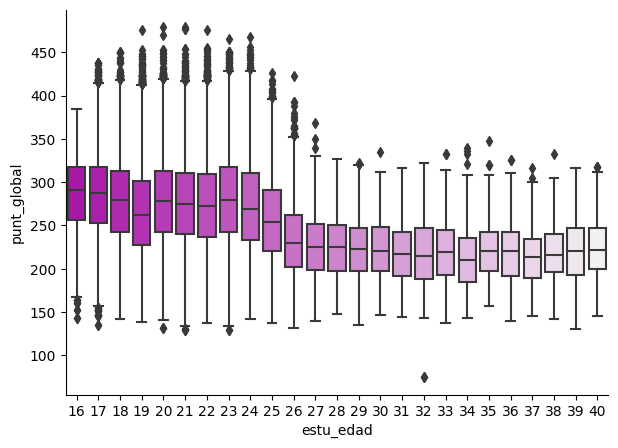

In [6]:
# Análisis de estrato
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.boxplot(data=df, x="estu_edad", y='punt_global', palette="light:m_r")


In [7]:
# Según las gráficas anteriores agrupar edades > 25 y < 18
def conditions(s):
    if(s['estu_edad'] <= 25):
        return '<= 25'
    else:
        return '>= 26'

df['estu_edad_cat'] = df.apply(conditions, axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334948 entries, 0 to 334947
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cole_cod_dane_sede        334948 non-null  int64  
 1   periodo                   334948 non-null  int64  
 2   cole_naturaleza           334948 non-null  object 
 3   cole_bilingue             334948 non-null  object 
 4   cole_calendario           334948 non-null  object 
 5   cole_jornada              334948 non-null  object 
 6   fami_tieneautomovil       334948 non-null  object 
 7   fami_estratovivienda      334948 non-null  object 
 8   fami_tieneinternet        334948 non-null  object 
 9   fami_tienecomputador      334948 non-null  object 
 10  estu_edad                 334948 non-null  int64  
 11  punt_c_naturales          334948 non-null  int64  
 12  punt_lectura_critica      334948 non-null  int64  
 13  punt_sociales_ciudadanas  334948 non-null  i

## Estrato

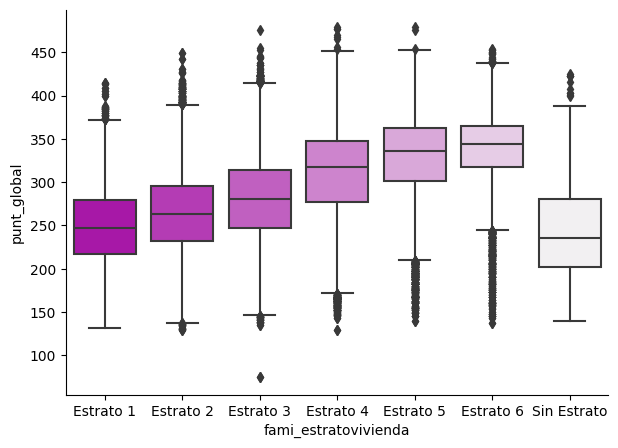

In [8]:
# Análisis de estrato
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.boxplot(data=df, x="fami_estratovivienda", y='punt_global', palette="light:m_r",
    order=['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6', 'Sin Estrato'])


In [9]:
# Según el boxplot anterior agrupar estratos 1 con 2 y estratos 5 con 6
def conditions(row):
    if row['fami_estratovivienda'] in ['Estrato 1', 'Estrato 2']:
        return 'Estrato 1 y 2'
    elif row['fami_estratovivienda'] in ['Estrato 5', 'Estrato 6']:
        return 'Estrato 5 y 6'
    else:
        return row['fami_estratovivienda']

df['fami_estratovivienda'] = df.apply(conditions, axis=1)

<Axes: xlabel='fami_estratovivienda', ylabel='count'>

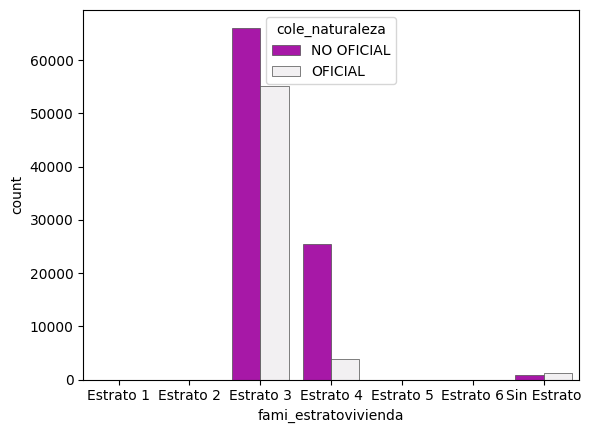

In [10]:
# Estrato vivienda
sns.countplot(df, x='fami_estratovivienda', hue='cole_naturaleza', palette="light:m_r", edgecolor=".3", linewidth=.5, 
              order=['Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6', 'Sin Estrato'])

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_7024\2306409725.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, y="fami_estratovivienda", x='punt_global', binwidth=(30,1), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)


<Axes: xlabel='punt_global', ylabel='fami_estratovivienda'>

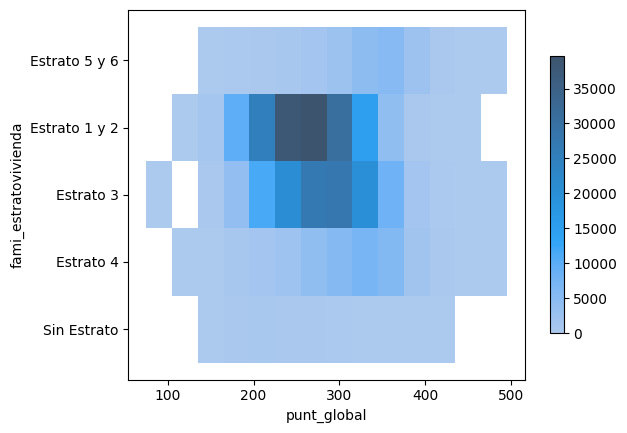

In [11]:
sns.histplot(data=df, y="fami_estratovivienda", x='punt_global', binwidth=(30,1), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)

## Desempeño de inglés

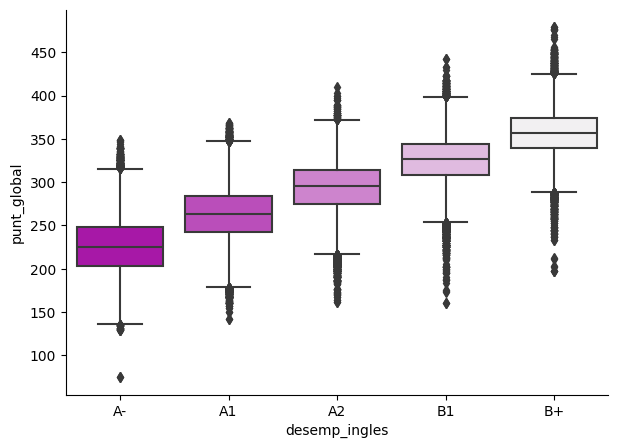

In [12]:
# Análisis de estrato
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.boxplot(data=df, x="desemp_ingles", y='punt_global', palette="light:m_r", order = ['A-', 'A1', 'A2', 'B1', 'B+'])


C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_7024\768203134.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="fami_tieneautomovil", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)


<Axes: xlabel='fami_tieneautomovil', ylabel='punt_global'>

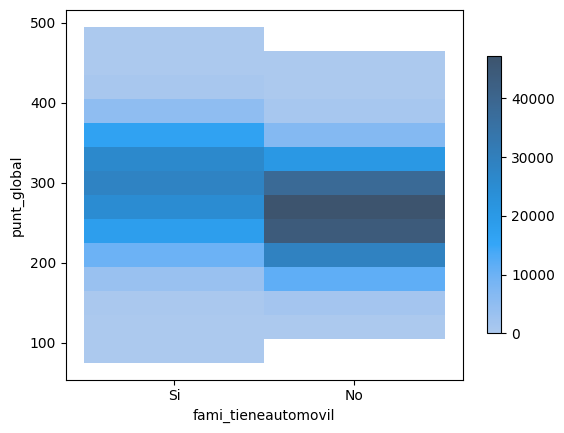

In [13]:
sns.histplot(data=df, x="fami_tieneautomovil", y='punt_global', binwidth=(1,30), legend=True, palette="light:m_r", cbar=True, cbar_kws=dict(shrink=.75),)

In [14]:
# Calcular el total de estudiantes - Para luego calcular porcentajes
total_students = df.groupby(['cole_cod_dane_sede','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada'],as_index=False).agg(total_students=('fami_tieneautomovil','count'))

# Agregar informacion y filtrar con k - 1 clases
# fami_tieneautomovil
result = df.groupby(['cole_cod_dane_sede','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada', 'fami_tieneautomovil', 'fami_estratovivienda', \
    'fami_tieneinternet', 'fami_tienecomputador', 'estu_edad_cat', 'desemp_ingles'], 
    as_index=False).agg(
            total_rows=('fami_tieneautomovil', 'count'),
            avg_punt_c_naturales=('punt_c_naturales','mean'),
            avg_punt_lectura_critica=('punt_lectura_critica','mean'),	
            avg_punt_sociales_ciudadanas=('punt_sociales_ciudadanas','mean'),	
            avg_punt_matematicas=('punt_matematicas','mean'),
            avg_punt_global=('punt_global','mean')
    )
# agg_automovil = agg_automovil[agg_automovil['fami_tieneautomovil'] == 'Si']


# Hacer left join
result = pd.merge(result, total_students, on = ['cole_cod_dane_sede','cole_naturaleza', 'cole_bilingue', 'cole_calendario', 'cole_jornada'])
print(result.shape)
result.head(50)

(42444, 18)


,cole_cod_dane_sede,cole_naturaleza,cole_bilingue,cole_calendario,cole_jornada,fami_tieneautomovil,fami_estratovivienda,fami_tieneinternet,fami_tienecomputador,estu_edad_cat,desemp_ingles,total_rows,avg_punt_c_naturales,avg_punt_lectura_critica,avg_punt_sociales_ciudadanas,avg_punt_matematicas,avg_punt_global,total_students
0,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,No,No,<= 25,A-,7,46.142857,51.000000,50.000000,49.571429,243.571429,457
1,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,No,No,<= 25,A1,7,56.428571,59.142857,53.428571,56.142857,280.285714,457
2,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,No,No,<= 25,A2,1,62.000000,55.000000,63.000000,54.000000,293.000000,457
3,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,No,Si,<= 25,A-,2,68.000000,60.000000,53.000000,68.000000,305.000000,457
4,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,Si,No,<= 25,A-,2,50.000000,61.000000,40.000000,50.000000,247.000000,457
5,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,Si,No,<= 25,A1,8,48.250000,51.500000,51.250000,54.000000,255.500000,457
6,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,Si,Si,<= 25,A-,21,48.571429,52.523810,46.714286,51.809524,245.619048,457
7,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,Si,Si,<= 25,A1,12,58.416667,61.333333,56.916667,56.333333,289.416667,457
8,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,Si,Si,<= 25,A2,14,53.142857,59.000000,56.428571,56.857143,283.571429,457
9,111001000078,OFICIAL,N,A,UNICA,No,Estrato 1 y 2,Si,Si,<= 25,B1,3,57.000000,60.666667,60.000000,63.333333,306.000000,457


## Discretización de las variables

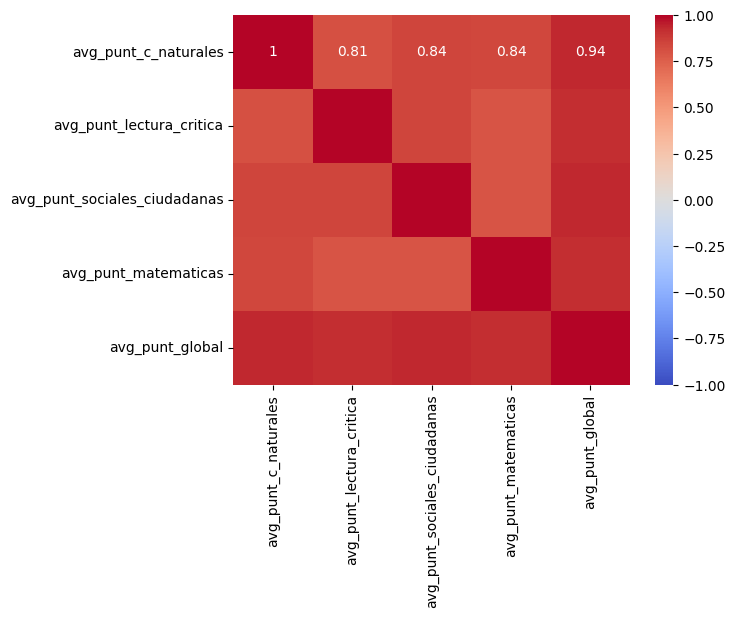

In [27]:
# Correlación entre variables continuas
result_continuas = result[['avg_punt_c_naturales',	'avg_punt_lectura_critica',	'avg_punt_sociales_ciudadanas',	'avg_punt_matematicas',	'avg_punt_global']]
correlation_matrix = result_continuas.corr()

# plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

C:\Users\jeison.orjuela\AppData\Local\Temp\ipykernel_7024\1437541800.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=result, x="avg_punt_global", binwidth=20, palette="light:m_r", edgecolor=".3")


count    42444.000000
mean       270.148878
std         45.430293
min         75.000000
25%        236.500000
50%        268.600000
75%        302.213778
max        452.000000
Name: avg_punt_global, dtype: float64


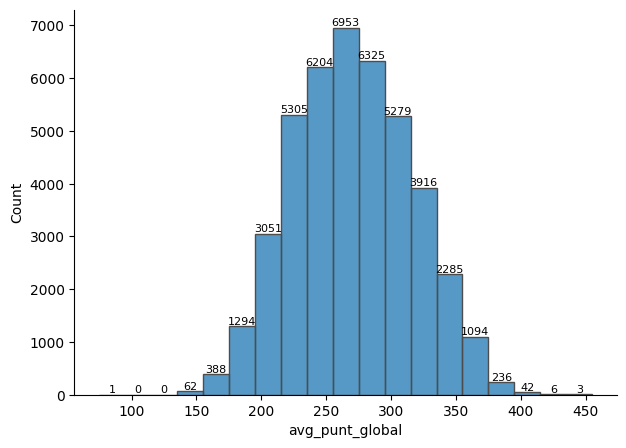

In [24]:
# Discretizar variable a predecir punt_global
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax = sns.histplot(data=result, x="avg_punt_global", binwidth=20, palette="light:m_r", edgecolor=".3")
ax.bar_label(ax.containers[1], fontsize=8)
print(result['avg_punt_global'].describe())
plt.show()


In [28]:
# Discretizar variable avg_punt_global
bins = [0, 236.5, 268, 302, 453]
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['Low', 'Medium', 'High', 'Very High']

#Se crea una nueva columna discretizdada dentro del dataframe final 
result['avg_punt_global'] = pd.cut(result['avg_punt_global'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
result['avg_punt_global']

0           Medium
1             High
2             High
3        Very High
4           Medium
           ...    
42439         High
42440    Very High
42441    Very High
42442         High
42443    Very High
Name: avg_punt_global, Length: 42444, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [29]:
result.drop(['avg_punt_c_naturales',	'avg_punt_lectura_critica',	'avg_punt_sociales_ciudadanas',	'avg_punt_matematicas'], axis=1)
result.to_csv('data_discreta.csv', sep = ";")